# Análise de Dados de Fundos Imobiliários

## 0. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set(context='notebook', palette='dark', color_codes=True)

from data_miner import DataFII
import exploratory_analysis as ea

## 1. Explorando e Preparando os Dados
Os dados aqui contidos foram obtidos no dia 29/07/2021 a partir dos seguintes sites:
 - Funds Explorer - www.fundsexplorer.com.br
 - Status Invest - www.statusinvest.com.br

In [2]:
# Obtem dados da pasta /data/
df = DataFII().get_FII_data()
print(df.shape)
df.head()

(357, 34)


,ticker,nome,tipo_gestao,setor,preço,dy,pct_caixa,num_cotistas,PL,PVPA,...,rent_periodo,rent_acc,VPA,dy_VPA,var_VPA,rent_VPA_periodo,rent_VPA_acc,vacancia_fisica,vacancia_financeira,qtd_ativos
0,BRLA11,FUNDO DE INVESTIMENTO IMOBILIÁRIO BRL PROP II,Passiva,Híbrido,0.0,0.0000,0.7435,84.0,1.376312e+08,NaN,...,0.00,0.00,140.98,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,EGYR11,ENERGY RESORT FDO. INVEST. IMOB,Passiva,NaN,0.0,0.0000,0.0576,21.0,9.322396e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FINF11,Infra Real State,Ativa,NaN,0.0,0.0000,0.7986,4.0,8.364985e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCAS11,Edifício Castelo,Passiva,NaN,0.0,0.0000,186.1664,2.0,8.068422e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHPH11,Shopping Patio Higienopolis,Passiva,Shoppings,807.0,3.4885,0.4134,3105.0,5.013048e+08,0.9803,...,0.24,-0.33,823.23,NaN,NaN,NaN,NaN,13.3,NaN,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               357 non-null    object 
 1   nome                 356 non-null    object 
 2   tipo_gestao          356 non-null    object 
 3   setor                245 non-null    object 
 4   preço                356 non-null    float64
 5   dy                   356 non-null    float64
 6   pct_caixa            352 non-null    float64
 7   num_cotistas         356 non-null    float64
 8   PL                   356 non-null    float64
 9   PVPA                 302 non-null    float64
 10  liquidez_diaria_avg  284 non-null    float64
 11  cagr_dividendo       120 non-null    float64
 12  cagr_cota            113 non-null    float64
 13  num_negocios         238 non-null    float64
 14  div_mes_brl          246 non-null    float64
 15  dy_1m                233 non-null    flo

O Dataframe possui 34 características/informações de **357 FIIs**.

Todos os dados já foram pré-processados pelo `data_miner.py` com o objetivo de limpar e definir a correta tipagem dos dados (os arquivos .csv na pasta `data/` estão no formato cru, ou seja, dados não processados, conforme foram obtidos na web). 

Entretanto, pode-se observar que há muitos dados faltantes. Vamos analisar caso a caso.

### 1.1 Dados Faltantes

In [4]:
df.isna().sum()

ticker                   0
nome                     1
tipo_gestao              1
setor                  112
preço                    1
dy                       1
pct_caixa                5
num_cotistas             1
PL                       1
PVPA                    55
liquidez_diaria_avg     73
cagr_dividendo         237
cagr_cota              244
num_negocios           119
div_mes_brl            111
dy_1m                  124
dy_3m_acc              124
dy_6m_acc              124
dy_12m_acc             124
dy_3m_avg              124
dy_6m_avg              124
dy_12m_avg             124
dy_ano                 137
var_preço              124
rent_periodo           124
rent_acc               124
VPA                    111
dy_VPA                 348
var_VPA                348
rent_VPA_periodo       348
rent_VPA_acc           348
vacancia_fisica        239
vacancia_financeira    331
qtd_ativos             111
dtype: int64

Existe uma observaçao sem nome. Buscando-a é possível observar que se trata do FII `YUFI11B` que em uma base dados aparece sem o final "B" de Balcão, linhas 354 e 356. Como o fundo possui somente 9 cotistas (filtro de número de cotistas será adicionado posteriormente), essa observação será removida.

In [5]:
i = df[df['nome'].isna()].index[0]
df.loc[i-2:i,:]

,ticker,nome,tipo_gestao,setor,preço,dy,pct_caixa,num_cotistas,PL,PVPA,...,rent_periodo,rent_acc,VPA,dy_VPA,var_VPA,rent_VPA_periodo,rent_VPA_acc,vacancia_fisica,vacancia_financeira,qtd_ativos
354,YUFI11,YUCA FDO INV. IMOB.,Ativa,NaN,0.00,0.0,1.8786,9.0,37581481.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,ZIFI11,ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO,Ativa,NaN,1200.01,0.0,2.7883,16.0,23483861.85,1.0616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,YUFI11B,NaN,NaN,Residencial,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,95.11,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
df.drop(i, inplace = True)
df.isna().sum()

ticker                   0
nome                     0
tipo_gestao              0
setor                  112
preço                    0
dy                       0
pct_caixa                4
num_cotistas             0
PL                       0
PVPA                    54
liquidez_diaria_avg     72
cagr_dividendo         236
cagr_cota              243
num_negocios           118
div_mes_brl            111
dy_1m                  124
dy_3m_acc              124
dy_6m_acc              124
dy_12m_acc             124
dy_3m_avg              124
dy_6m_avg              124
dy_12m_avg             124
dy_ano                 136
var_preço              124
rent_periodo           124
rent_acc               124
VPA                    111
dy_VPA                 347
var_VPA                347
rent_VPA_periodo       347
rent_VPA_acc           347
vacancia_fisica        238
vacancia_financeira    330
qtd_ativos             111
dtype: int64

Há 112 valores nulos na variável `setor`. Vamos observá-los!

In [7]:
setor_na = df.loc[df['setor'].isna()]
setor_na.head(10)

,ticker,nome,tipo_gestao,setor,preço,dy,pct_caixa,num_cotistas,PL,PVPA,...,rent_periodo,rent_acc,VPA,dy_VPA,var_VPA,rent_VPA_periodo,rent_VPA_acc,vacancia_fisica,vacancia_financeira,qtd_ativos
1,EGYR11,ENERGY RESORT FDO. INVEST. IMOB,Passiva,NaN,0.00,0.0000,0.0576,21.0,9.322396e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FINF11,Infra Real State,Ativa,NaN,0.00,0.0000,0.7986,4.0,8.364985e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCAS11,Edifício Castelo,Passiva,NaN,0.00,0.0000,186.1664,2.0,8.068422e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ANCR11B,Ancar CI,Ativa,NaN,3400.00,1.1037,0.9010,55.0,1.502356e+09,1.0209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BRIM11,BRIO REAL ESTATE II - FDO INV IMOB,Ativa,NaN,1200.01,0.0000,5.4897,121.0,1.204895e+08,1.2363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,BRIP11,BRIO REAL ESTATE III,Ativa,NaN,1099.00,0.0000,19.9399,235.0,1.070182e+08,1.1126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,BTRA11,FDO INV IMOB BTG PACTUAL TERRAS AGRÍCOLAS,Ativa,NaN,96.10,0.0029,100.0140,7275.0,3.362901e+08,0.9615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,BTSG11,BTSP I FDO. INVEST. IMOB,Ativa,NaN,0.00,0.0000,0.9152,52.0,7.261384e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,BTSI11,BTSP II FUNDO DE INVESTIMENTO IMOBILIÁRIO,Ativa,NaN,0.00,0.0000,0.3145,52.0,1.784025e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,BVAR11,Brasil Varejo,Passiva,NaN,0.00,0.0000,0.8708,69.0,6.801733e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(list(setor_na.ticker))

['EGYR11', 'FINF11', 'FCAS11', 'ANCR11B', 'BRIM11', 'BRIP11', 'BTRA11', 'BTSG11', 'BTSI11', 'BVAR11', 'BZEL11', 'DOVL11B', 'FISD11', 'FOFT11', 'FVBI11', 'GRLV11', 'JTPR11', 'LOFT11B', 'MINT11', 'PBLV11', 'PRTS11', 'RBRM11', 'RMAI11', 'SOLR11', 'SPAF11', 'TBOF11', 'TCIN11', 'TCPF11', 'TORM13', 'TOUR11', 'VCRR11', 'VTRT11', 'VTVI11', 'VTXI11', 'XPHT12', 'ATCR11', 'ATWN11', 'VERE11', 'CJFI11', 'BMII11', 'ERPA11', 'BPRP11', 'BRHT11B', 'HBTT11', 'HCST11', 'HMOC11', 'JBFO11', 'CCRF11', 'ESTQ11', 'LATR11B', 'LKDV11', 'BLMO11', 'AQLL11', 'ARFI11B', 'FPNG11', 'FTCE11B', 'HUSI11', 'MORC11', 'CFHI11', 'BICE11', 'BTWR11', 'DLMT11', 'IBCR11', 'KEVE11', 'MTOF11', 'PEMA11', 'DAMT11B', 'DVFF11', 'NPAR11', 'RBTS11', 'RCRI11B', 'ELDO11B', 'HBCR11', 'PNDL11', 'PNPR11', 'PRZS11', 'JPPC11', 'MGLG11', 'LSPA11', 'MVFI11', 'MOFF11', 'RBIR11', 'PRSN11B', 'REIT11', 'SFND11', 'PATB11', 'QAMI11', 'RCFA11', 'RCFF11', 'SHDP11B', 'SHOP11', 'ROOF11', 'RSPD11', 'SAIC11B', 'SALI11', 'SBCL11', 'TFOF11', 'SJAU11', 'VSEC1

É possível observar que os fundos que não possuem dados para o setor, não possuem dados para várias variáveis mais a direita do DF (variáveis obtidas atraves do site Funds Explorer). Isso se deve ao fato de as fontes de dados retornarem quantidades diferentes de Fundos Imobiliários:

In [9]:
qtd_fe = len(DataFII().get_raw_data_fundsexplorer())
qtd_si = len(DataFII().get_raw_data_statusinvest())

print("Quantidade de FIIs em Funds Explorer: {}".format(qtd_fe))
print("Quantidade de FIIs em Status Invest: {}".format(qtd_si))
qtd_si - qtd_fe

Quantidade de FIIs em Funds Explorer: 246
Quantidade de FIIs em Status Invest: 356


110

Analisando esses fundos pode-se observar que muitos são fundos pequenos sem negociação em bolsa de valores ou que já fecharam.

Logo, essas observações serão excluidas:

In [10]:
df.drop(setor_na.index, inplace = True)
df.isna().sum()

ticker                   0
nome                     0
tipo_gestao              0
setor                    0
preço                    0
dy                       0
pct_caixa                2
num_cotistas             0
PL                       0
PVPA                     5
liquidez_diaria_avg      6
cagr_dividendo         138
cagr_cota              138
num_negocios             7
div_mes_brl              0
dy_1m                   12
dy_3m_acc               12
dy_6m_acc               12
dy_12m_acc              12
dy_3m_avg               12
dy_6m_avg               12
dy_12m_avg              12
dy_ano                  24
var_preço               12
rent_periodo            12
rent_acc                12
VPA                      0
dy_VPA                 235
var_VPA                235
rent_VPA_periodo       235
rent_VPA_acc           235
vacancia_fisica        126
vacancia_financeira    218
qtd_ativos               0
dtype: int64

In [11]:
len(df)

244

As variáveis `dy_VPA`, `var_VPA`, `rent_VPA_periodo`, `rent_VPA_acc` e `vacancia_financeira` possuem pouquísimos dados, somente 9 (26 para vacancia_financeira) das 244 observações contém algum tipo de informação. 

Essas variáveis serão removidas:

In [12]:
df.drop(['dy_VPA', 'var_VPA', 'rent_VPA_periodo', 'rent_VPA_acc', 'vacancia_financeira'],
        axis = 1, inplace = True)
df.isna().sum()

ticker                   0
nome                     0
tipo_gestao              0
setor                    0
preço                    0
dy                       0
pct_caixa                2
num_cotistas             0
PL                       0
PVPA                     5
liquidez_diaria_avg      6
cagr_dividendo         138
cagr_cota              138
num_negocios             7
div_mes_brl              0
dy_1m                   12
dy_3m_acc               12
dy_6m_acc               12
dy_12m_acc              12
dy_3m_avg               12
dy_6m_avg               12
dy_12m_avg              12
dy_ano                  24
var_preço               12
rent_periodo            12
rent_acc                12
VPA                      0
vacancia_fisica        126
qtd_ativos               0
dtype: int64

As variáveis de CAGR possuem uma grande quantidade de valores nulos, grande parte devido ao fato de o fundo ter menos que 5 anos. Criaremos uma variável categórica `menos_5_anos` para identificar os fundos que possuem ambos os CAGRs ausentes e os valores ausentes serão preenchidos com zero.

`Nota: CAGR vem do inglês "Compound Annual Growth Rate" (Taxa de Crescimento Anual Composta) e é, geralmente, calculada com base em dados dos últimos 5 anos.`

In [13]:
# Insere na posição coluna 4, a fim de manter variáveis categóricas no começo do dataframe
df.insert(4, 'menos_5_anos', False)
df.loc[(df['cagr_dividendo'].isna()) & (df['cagr_cota'].isna()),'menos_5_anos'] = True

In [14]:
df.head()

,ticker,nome,tipo_gestao,setor,menos_5_anos,preço,dy,pct_caixa,num_cotistas,PL,...,dy_3m_avg,dy_6m_avg,dy_12m_avg,dy_ano,var_preço,rent_periodo,rent_acc,VPA,vacancia_fisica,qtd_ativos
0,BRLA11,FUNDO DE INVESTIMENTO IMOBILIÁRIO BRL PROP II,Passiva,Híbrido,True,0.0,0.0000,0.7435,84.0,1.376312e+08,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,140.98,NaN,0.0
4,SHPH11,Shopping Patio Higienopolis,Passiva,Shoppings,False,807.0,3.4885,0.4134,3105.0,5.013048e+08,...,0.25,0.37,0.28,1.27,0.00,0.24,-0.33,823.23,13.3,1.0
5,ALZR11,Alianza Trust Renda Imobiliária,Ativa,Logística,False,122.0,5.1902,1.8679,93070.0,5.450889e+08,...,0.53,0.49,0.41,2.91,5.65,6.18,-0.60,102.50,0.0,13.0
7,BBRC11,BB Renda Corporativa,Passiva,Outros,False,112.9,10.0089,4.0449,8727.0,1.794707e+08,...,0.77,0.77,0.72,4.61,-3.22,-2.49,-6.74,112.87,5.4,20.0
8,BICR11,INTER TÍTULOS IMOB. FDO INV. IMOB.,Ativa,Títulos e Val. Mob.,True,96.0,3.2083,9.6076,602.0,4.953674e+07,...,0.34,0.30,0.26,1.78,-0.94,-0.62,-4.55,99.07,NaN,0.0


In [15]:
df.loc[:,['cagr_dividendo', 'cagr_cota']] = df[['cagr_dividendo', 'cagr_cota']].fillna(value = 0)

In [16]:
df.isna().sum()

ticker                   0
nome                     0
tipo_gestao              0
setor                    0
menos_5_anos             0
preço                    0
dy                       0
pct_caixa                2
num_cotistas             0
PL                       0
PVPA                     5
liquidez_diaria_avg      6
cagr_dividendo           0
cagr_cota                0
num_negocios             7
div_mes_brl              0
dy_1m                   12
dy_3m_acc               12
dy_6m_acc               12
dy_12m_acc              12
dy_3m_avg               12
dy_6m_avg               12
dy_12m_avg              12
dy_ano                  24
var_preço               12
rent_periodo            12
rent_acc                12
VPA                      0
vacancia_fisica        126
qtd_ativos               0
dtype: int64

Vacância Física é ausente em 126 observações. Alguns são dados ausentes, mas a maioria (75 observações) são fundos de "Títulos e Valores Mobiliários", no qual o conceito de vacância não se aplica.

Esses valores serão preenchidos com zeros:

In [17]:
df[df['vacancia_fisica'].isna()].head()

,ticker,nome,tipo_gestao,setor,menos_5_anos,preço,dy,pct_caixa,num_cotistas,PL,...,dy_3m_avg,dy_6m_avg,dy_12m_avg,dy_ano,var_preço,rent_periodo,rent_acc,VPA,vacancia_fisica,qtd_ativos
0,BRLA11,FUNDO DE INVESTIMENTO IMOBILIÁRIO BRL PROP II,Passiva,Híbrido,True,0.00,0.0000,0.7435,84.0,1.376312e+08,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,140.98,NaN,0.0
8,BICR11,INTER TÍTULOS IMOB. FDO INV. IMOB.,Ativa,Títulos e Val. Mob.,True,96.00,3.2083,9.6076,602.0,4.953674e+07,...,0.34,0.30,0.26,1.78,-0.94,-0.62,-4.55,99.07,NaN,0.0
11,BTAL11,BTG PACTUAL AGRO LOGÍSTICA,Ativa,Outros,True,98.28,2.2549,33.8504,10544.0,6.132124e+08,...,0.56,0.00,0.00,2.02,-0.28,0.38,-1.13,100.55,NaN,7.0
12,BTCR11,BTG Pactual Crédito Imobiliário,Ativa,Títulos e Val. Mob.,False,93.97,6.8445,5.6180,9427.0,4.681521e+08,...,0.74,0.71,0.60,4.24,0.83,1.61,10.18,97.33,NaN,0.0
19,BZLI11,Brazil Realty,Ativa,Títulos e Val. Mob.,False,14.58,0.0000,2.7259,30.0,4.449849e+08,...,0.00,0.00,0.00,0.00,0.68,0.68,1.14,11.37,NaN,0.0


In [18]:
df.loc[df['vacancia_fisica'].isna(),['ticker', 'setor']].groupby('setor').count()

,ticker
setor,
Hospital,1
Hotel,1
Híbrido,20
Lajes Corporativas,2
Logística,1
Outros,21
Residencial,5
Títulos e Val. Mob.,75


In [19]:
df.loc[:,'vacancia_fisica'] = df['vacancia_fisica'].fillna(value = 0)

In [20]:
df.isna().sum()

ticker                  0
nome                    0
tipo_gestao             0
setor                   0
menos_5_anos            0
preço                   0
dy                      0
pct_caixa               2
num_cotistas            0
PL                      0
PVPA                    5
liquidez_diaria_avg     6
cagr_dividendo          0
cagr_cota               0
num_negocios            7
div_mes_brl             0
dy_1m                  12
dy_3m_acc              12
dy_6m_acc              12
dy_12m_acc             12
dy_3m_avg              12
dy_6m_avg              12
dy_12m_avg             12
dy_ano                 24
var_preço              12
rent_periodo           12
rent_acc               12
VPA                     0
vacancia_fisica         0
qtd_ativos              0
dtype: int64

Existem 5 observações de PVPA (Preço dividido por Valor Patrimonial) ausentes. Em geral são fundos pequenos, com baixa liquidez que serão removidos da análise.

In [21]:
df.loc[df['PVPA'].isna(), ['ticker', 'preço', 'PL', 'liquidez_diaria_avg', 'num_negocios']]

,ticker,preço,PL,liquidez_diaria_avg,num_negocios
0,BRLA11,0.00,1.376312e+08,NaN,NaN
84,PABY11,12.58,-6.281734e+06,3090.38,54.0
112,SPVJ11,0.00,5.302450e+08,NaN,NaN
140,BBIM11,0.00,6.462463e+07,NaN,NaN
274,RBCB11,19.00,0.000000e+00,NaN,161.0


In [22]:
df.dropna(subset = ['PVPA'], axis = 0, inplace = True)

In [23]:
df.isna().sum()

ticker                  0
nome                    0
tipo_gestao             0
setor                   0
menos_5_anos            0
preço                   0
dy                      0
pct_caixa               0
num_cotistas            0
PL                      0
PVPA                    0
liquidez_diaria_avg     2
cagr_dividendo          0
cagr_cota               0
num_negocios            4
div_mes_brl             0
dy_1m                  12
dy_3m_acc              12
dy_6m_acc              12
dy_12m_acc             12
dy_3m_avg              12
dy_6m_avg              12
dy_12m_avg             12
dy_ano                 21
var_preço              12
rent_periodo           12
rent_acc               12
VPA                     0
vacancia_fisica         0
qtd_ativos              0
dtype: int64

As demais variáveis sem dados terão seus valores definidos como zeros.

In [24]:
df.fillna(value = 0, inplace = True)
df.isna().sum()

ticker                 0
nome                   0
tipo_gestao            0
setor                  0
menos_5_anos           0
preço                  0
dy                     0
pct_caixa              0
num_cotistas           0
PL                     0
PVPA                   0
liquidez_diaria_avg    0
cagr_dividendo         0
cagr_cota              0
num_negocios           0
div_mes_brl            0
dy_1m                  0
dy_3m_acc              0
dy_6m_acc              0
dy_12m_acc             0
dy_3m_avg              0
dy_6m_avg              0
dy_12m_avg             0
dy_ano                 0
var_preço              0
rent_periodo           0
rent_acc               0
VPA                    0
vacancia_fisica        0
qtd_ativos             0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 4 to 353
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticker               239 non-null    object 
 1   nome                 239 non-null    object 
 2   tipo_gestao          239 non-null    object 
 3   setor                239 non-null    object 
 4   menos_5_anos         239 non-null    bool   
 5   preço                239 non-null    float64
 6   dy                   239 non-null    float64
 7   pct_caixa            239 non-null    float64
 8   num_cotistas         239 non-null    float64
 9   PL                   239 non-null    float64
 10  PVPA                 239 non-null    float64
 11  liquidez_diaria_avg  239 non-null    float64
 12  cagr_dividendo       239 non-null    float64
 13  cagr_cota            239 non-null    float64
 14  num_negocios         239 non-null    float64
 15  div_mes_brl          239 non-null    flo

Dessa forma, é finalizado o tratamento de dados faltantes.

O Dataframe resultante possui **239 observações com 29 variáveis**.

## 1.2 Análise Exploratória

In [26]:
df.head()


,ticker,nome,tipo_gestao,setor,menos_5_anos,preço,dy,pct_caixa,num_cotistas,PL,...,dy_3m_avg,dy_6m_avg,dy_12m_avg,dy_ano,var_preço,rent_periodo,rent_acc,VPA,vacancia_fisica,qtd_ativos
4,SHPH11,Shopping Patio Higienopolis,Passiva,Shoppings,False,807.00,3.4885,0.4134,3105.0,5.013048e+08,...,0.25,0.37,0.28,1.27,0.00,0.24,-0.33,823.23,13.3,1.0
5,ALZR11,Alianza Trust Renda Imobiliária,Ativa,Logística,False,122.00,5.1902,1.8679,93070.0,5.450889e+08,...,0.53,0.49,0.41,2.91,5.65,6.18,-0.60,102.50,0.0,13.0
7,BBRC11,BB Renda Corporativa,Passiva,Outros,False,112.90,10.0089,4.0449,8727.0,1.794707e+08,...,0.77,0.77,0.72,4.61,-3.22,-2.49,-6.74,112.87,5.4,20.0
8,BICR11,INTER TÍTULOS IMOB. FDO INV. IMOB.,Ativa,Títulos e Val. Mob.,True,96.00,3.2083,9.6076,602.0,4.953674e+07,...,0.34,0.30,0.26,1.78,-0.94,-0.62,-4.55,99.07,0.0,0.0
11,BTAL11,BTG PACTUAL AGRO LOGÍSTICA,Ativa,Outros,True,98.28,2.2549,33.8504,10544.0,6.132124e+08,...,0.56,0.00,0.00,2.02,-0.28,0.38,-1.13,100.55,0.0,7.0


In [27]:
df.iloc[:,0:20].describe()


,preço,dy,pct_caixa,num_cotistas,PL,PVPA,liquidez_diaria_avg,cagr_dividendo,cagr_cota,num_negocios,div_mes_brl,dy_1m,dy_3m_acc,dy_6m_acc,dy_12m_acc
count,239.000000,239.000000,239.000000,239.000000,2.390000e+02,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,468.371799,34.291010,12.124414,26390.192469,5.317498e+08,0.934475,1.199739e+06,-0.104913,-1.664007,16258.602510,1.601088,0.955230,2.022845,3.319498,5.236987
std,5014.188464,388.479603,37.787189,54127.379111,7.238820e+08,0.295661,1.986200e+06,12.365774,10.858861,42672.572167,5.396384,3.134606,3.279015,3.870701,5.618901
min,0.720000,0.000000,0.000000,5.000000,1.431703e+06,0.000500,0.000000e+00,-41.908800,-71.883700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.945000,3.874250,1.226250,1582.500000,1.059998e+08,0.853900,7.479548e+04,0.000000,-0.036400,212.500000,0.435000,0.445000,1.090000,1.185000,0.000000
50%,98.000000,6.802800,3.085100,5259.000000,2.603877e+08,0.958000,3.473246e+05,0.000000,0.000000,2447.000000,0.650000,0.670000,1.840000,3.360000,5.660000
75%,111.300000,8.851900,9.847350,23979.000000,6.043901e+08,1.025600,1.476266e+06,0.000000,0.000000,12307.000000,1.000000,0.840000,2.360000,4.405000,8.065000
max,77550.000000,6000.912300,423.836500,416044.000000,4.813932e+09,3.981500,1.109443e+07,91.640200,78.505700,503587.000000,60.120000,36.320000,37.990000,40.960000,45.220000


Pode-se observar presença de alguns dados discrepantes (outliers). Alguns casos podem estar relacionados a fundos muito pequenos que nem são propriamente negociados em bolsa de valores. Irei aplicar um filtro para manter somente fundos com mais de 100 cotistas, uma líquidez diária maior que R$50.000 e pelo menos 50 negociações no dia, a fim de remover algumas dessas distorções.

In [28]:
limite_cotistas = 100
limite_liquidez = 50000
limite_negociacoes = 50
df = df.query(f'num_cotistas > {limite_cotistas} and liquidez_diaria_avg > {limite_liquidez} and num_negocios > {limite_negociacoes}').copy()
df.shape

(174, 30)

In [29]:
df.iloc[:,0:20].describe()

,preço,dy,pct_caixa,num_cotistas,PL,PVPA,liquidez_diaria_avg,cagr_dividendo,cagr_cota,num_negocios,div_mes_brl,dy_1m,dy_3m_acc,dy_6m_acc,dy_12m_acc
count,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,117.892644,7.818760,10.332048,35769.931034,6.703336e+08,0.942075,1.576455e+06,0.022152,-0.481463,20772.189655,1.203391,0.962529,2.193506,3.738391,6.027586
std,196.332414,4.823522,17.155971,60863.424122,7.965932e+08,0.174021,2.180597e+06,11.927332,6.436341,47892.158034,3.657473,2.475039,2.566286,3.185795,5.109562
min,0.720000,0.000000,0.000000,134.000000,2.824789e+07,0.102800,5.556810e+04,-38.553700,-57.243100,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.885000,5.250800,1.405725,4033.000000,1.656483e+08,0.889575,2.008170e+05,-1.381650,0.000000,1331.250000,0.500000,0.560000,1.597500,2.512500,0.000000
50%,98.075000,7.339150,3.976800,10693.500000,3.618728e+08,0.960300,6.909385e+05,0.000000,0.000000,5400.500000,0.665000,0.730000,2.060000,3.715000,6.530000
75%,108.795000,9.429025,10.989375,36026.750000,7.841342e+08,1.020000,2.127855e+06,0.000000,0.000000,19605.000000,1.000000,0.917500,2.487500,4.625000,8.600000
max,2500.000000,35.800600,127.837500,416044.000000,4.813932e+09,1.745200,1.109443e+07,91.640200,17.148400,503587.000000,44.200000,31.910000,32.570000,33.130000,35.560000


In [30]:
df.iloc[:,20:].describe()

,dy_3m_avg,dy_6m_avg,dy_12m_avg,dy_ano,var_preço,rent_periodo,rent_acc,VPA,vacancia_fisica,qtd_ativos
count,174.000000,174.000000,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,0.731207,0.622874,0.502184,4.040115,-2.22477,-1.272874,22.573793,123.254540,5.627759,4.166667
std,0.855736,0.530834,0.425592,3.137277,3.94812,4.925919,344.158695,196.466573,14.218231,9.122850
min,0.000000,0.000000,0.000000,0.000000,-28.14000,-28.140000,-95.480000,1.610000,0.000000,0.000000
25%,0.532500,0.420000,0.000000,2.837500,-4.24750,-3.512500,-8.032500,93.052500,0.000000,0.000000
50%,0.690000,0.620000,0.540000,3.745000,-1.79000,-1.320000,-2.550000,99.385000,0.000000,1.000000
75%,0.827500,0.770000,0.720000,4.705000,0.00000,0.465000,1.477500,106.605000,4.572500,5.000000
max,10.860000,5.520000,2.960000,33.450000,11.52000,32.490000,4533.540000,2521.860000,100.000000,72.000000


O preço da cota de um determinado FII não diz muito a seu respeito, já que é completamente dependente do número de cotas do fundo. Uma medida mais condizente seria o Valor de Mercado do Fundo que pode ser calculado da seguinte amneira:

$$ Valor de Mercado = PL * PVPA $$

Na sequência a coluna de `preço` será removida. A coluna `VPA` e `div_mes_brl`, também serão removidas, pela mesma razão:

In [31]:
df['valor_mercado'] = df['PL'] * df['PVPA']
df.drop(['preço', 'VPA', 'div_mes_brl'], axis = 1, inplace = True)

In [32]:
df.head()

,ticker,nome,tipo_gestao,setor,menos_5_anos,dy,pct_caixa,num_cotistas,PL,PVPA,...,dy_3m_avg,dy_6m_avg,dy_12m_avg,dy_ano,var_preço,rent_periodo,rent_acc,vacancia_fisica,qtd_ativos,valor_mercado
4,SHPH11,Shopping Patio Higienopolis,Passiva,Shoppings,False,3.4885,0.4134,3105.0,5.013048e+08,0.9803,...,0.25,0.37,0.28,1.27,0.00,0.24,-0.33,13.3,1.0,4.914291e+08
5,ALZR11,Alianza Trust Renda Imobiliária,Ativa,Logística,False,5.1902,1.8679,93070.0,5.450889e+08,1.1276,...,0.53,0.49,0.41,2.91,5.65,6.18,-0.60,0.0,13.0,6.146422e+08
7,BBRC11,BB Renda Corporativa,Passiva,Outros,False,10.0089,4.0449,8727.0,1.794707e+08,1.0003,...,0.77,0.77,0.72,4.61,-3.22,-2.49,-6.74,5.4,20.0,1.795246e+08
11,BTAL11,BTG PACTUAL AGRO LOGÍSTICA,Ativa,Outros,True,2.2549,33.8504,10544.0,6.132124e+08,0.9588,...,0.56,0.00,0.00,2.02,-0.28,0.38,-1.13,0.0,7.0,5.879481e+08
12,BTCR11,BTG Pactual Crédito Imobiliário,Ativa,Títulos e Val. Mob.,False,6.8445,5.6180,9427.0,4.681521e+08,0.9655,...,0.74,0.71,0.60,4.24,0.83,1.61,10.18,0.0,0.0,4.520008e+08


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


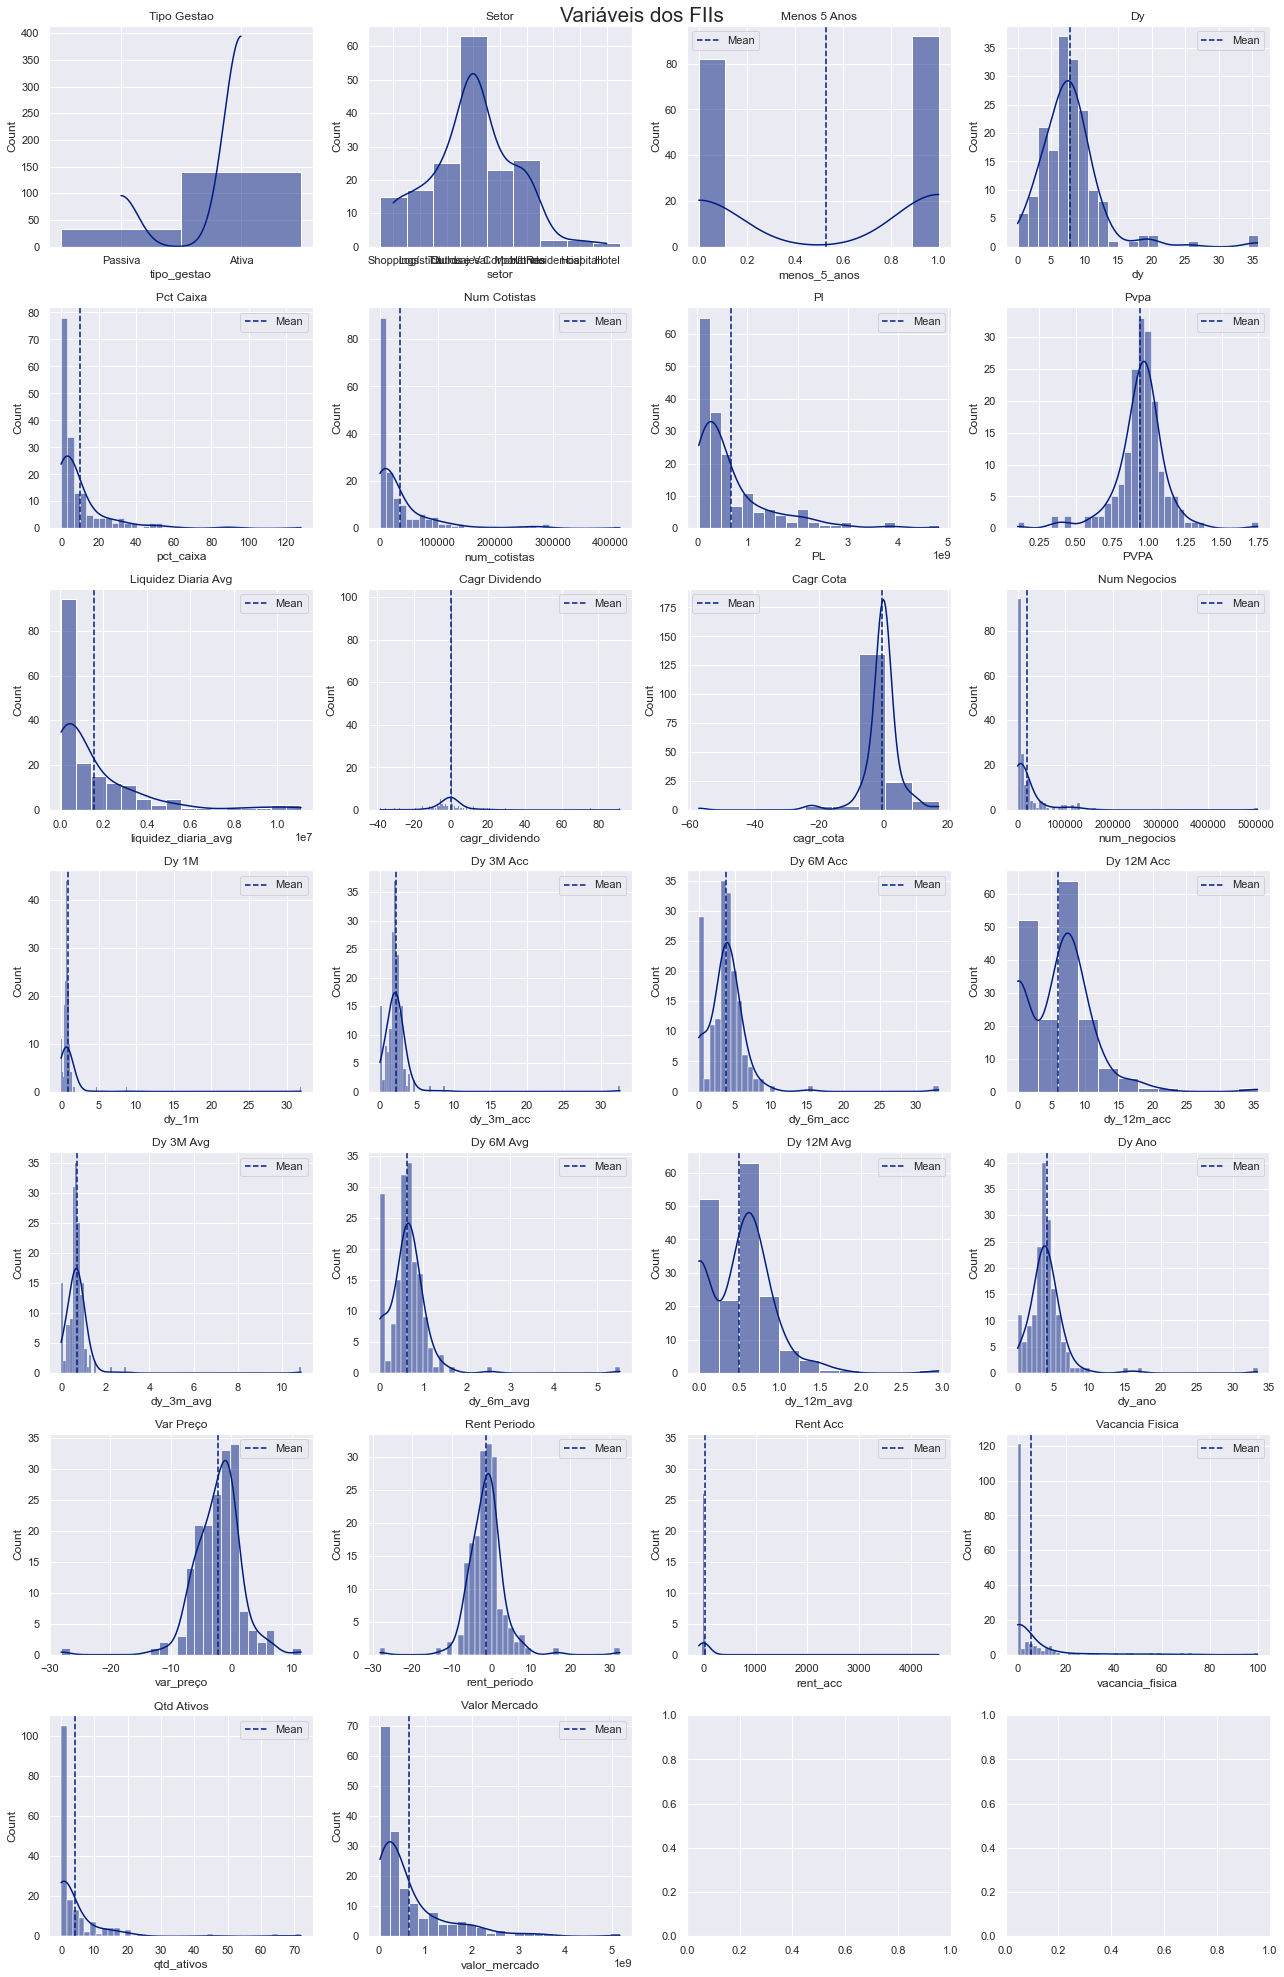

In [33]:
fig = ea.plot_histograms(df.iloc[:,2:], "Variáveis dos FIIs")
plt.show()

Podemos ainda observar alguns valores discrepantes que não fazem muito sentido, como:
 - Rentabilidade acumulada no último ano de cerca de 4.500%:

In [34]:
df.sort_values('rent_acc', ascending = False).loc[:,['ticker', 'rent_acc']].head()

,ticker,rent_acc
40,FLMA11,4533.54
117,THRA11,40.55
91,RBBV11,36.66
155,BBFI11B,22.92
136,AFOF11,17.52


Esse valor se apresenta como um erro na base de dados. Uma consulta ao [StatusInvest](https://statusinvest.com.br/fundos-imobiliarios/flma11) mostra que o retorno nos últimos 12 meses é de `-3,84%`. 

O novo valor será definido:

In [35]:
df.loc[df['ticker'] == 'FLMA11', 'rent_acc'] = -3.84
df.loc[df['ticker'] == 'FLMA11']

,ticker,nome,tipo_gestao,setor,menos_5_anos,dy,pct_caixa,num_cotistas,PL,PVPA,...,dy_3m_avg,dy_6m_avg,dy_12m_avg,dy_ano,var_preço,rent_periodo,rent_acc,vacancia_fisica,qtd_ativos,valor_mercado
40,FLMA11,Continental Square Faria Lima,Ativa,Híbrido,False,3.8499,2.2939,22398.0,2.147399e+08,0.8601,...,0.3,0.35,0.3,2.09,-2.41,-2.05,-3.84,6.0,2.0,1.846978e+08


 - DY de mais de 30% no último mês:

In [36]:
df.sort_values('dy_1m', ascending = False).loc[:,['ticker', 'dy_1m']].head()

,ticker,dy_1m
117,THRA11,31.91
136,AFOF11,8.76
111,SPTW11,4.63
122,URPR11,1.89
220,ARRI11,1.72


O fundo THRA11 está em processo de ser fechado, a distriubuição alta foi devido a venda de ativos. Dessa forma, não faz sentido manter o fundo na análise. 
[Fato Relevante](https://fnet.bmfbovespa.com.br/fnet/publico/visualizarDocumento?id=192326&flnk)

In [37]:
df.drop(df[df['ticker'] == 'THRA11'].index, axis = 0, inplace = True)

 - Percentual de dinheiro em caixa de maior que 100%:

In [38]:
df.sort_values('pct_caixa', ascending = False).loc[:,['ticker', 'pct_caixa']].head()

,ticker,pct_caixa
281,RBHY11,127.8375
324,VSLH11,90.1896
136,AFOF11,86.7733
184,CVBI11,63.3537
287,PORD11,53.5365


O Fundo RBHY11, de fato, possui mais dinheiro em caixa do que o valor de mercado ([Relatório Mensal](https://fnet.bmfbovespa.com.br/fnet/publico/visualizarDocumento?id=194681)), entretanto possui um passivo elevado (equivalente a praticamente toda disponibilidade de caixa). Logo este valor será mantido como tal.

Vamos explorar as correlações entre as variáveis.

Obs: Correlação calculada somente para variáveis numéricas.

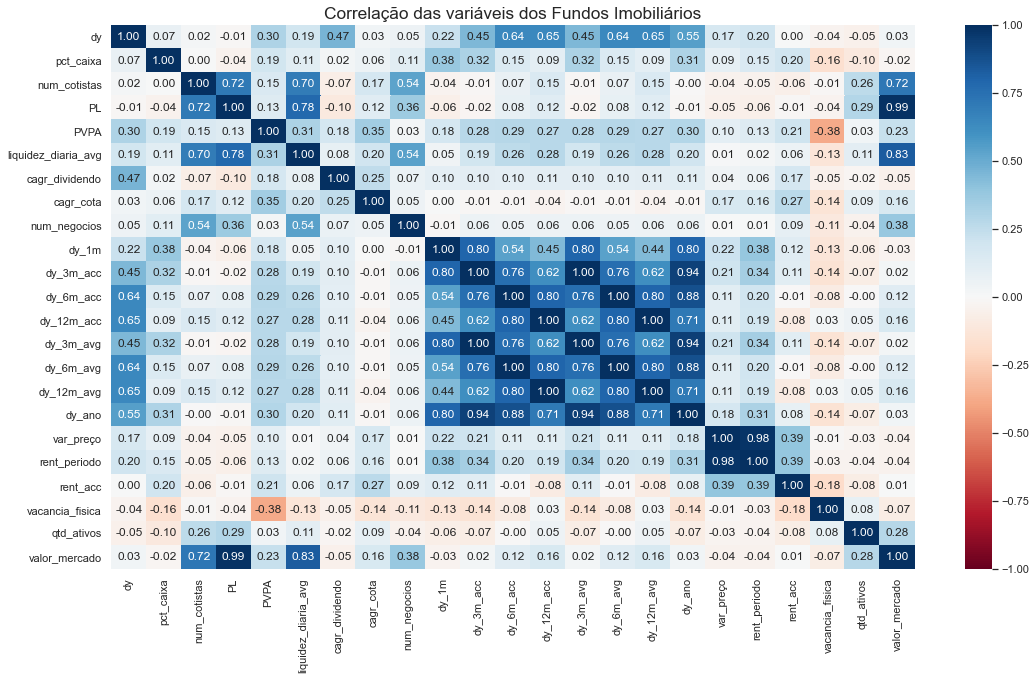

In [39]:
corr = df.iloc[:,5:].corr()

plt.figure(figsize=(18,10))

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = 'RdBu')

plt.title("Correlação das variáveis dos Fundos Imobiliários", size='x-large')

plt.show()

É possível observar, obviamente, que todas as variáveis de DY são altamente correlacionadas entre si, uma vez que as taxas de periodos menores estão incorporadas no cálculo das taxas de periodos mais longos.
O Valor de Mercado é altamente correlacionado com o PL, liquidez diária média (em reais) e com o número de cotistas do fundo. Ou seja, fundos maiores tendem a ter mais investidores e um volume de negociação maior.

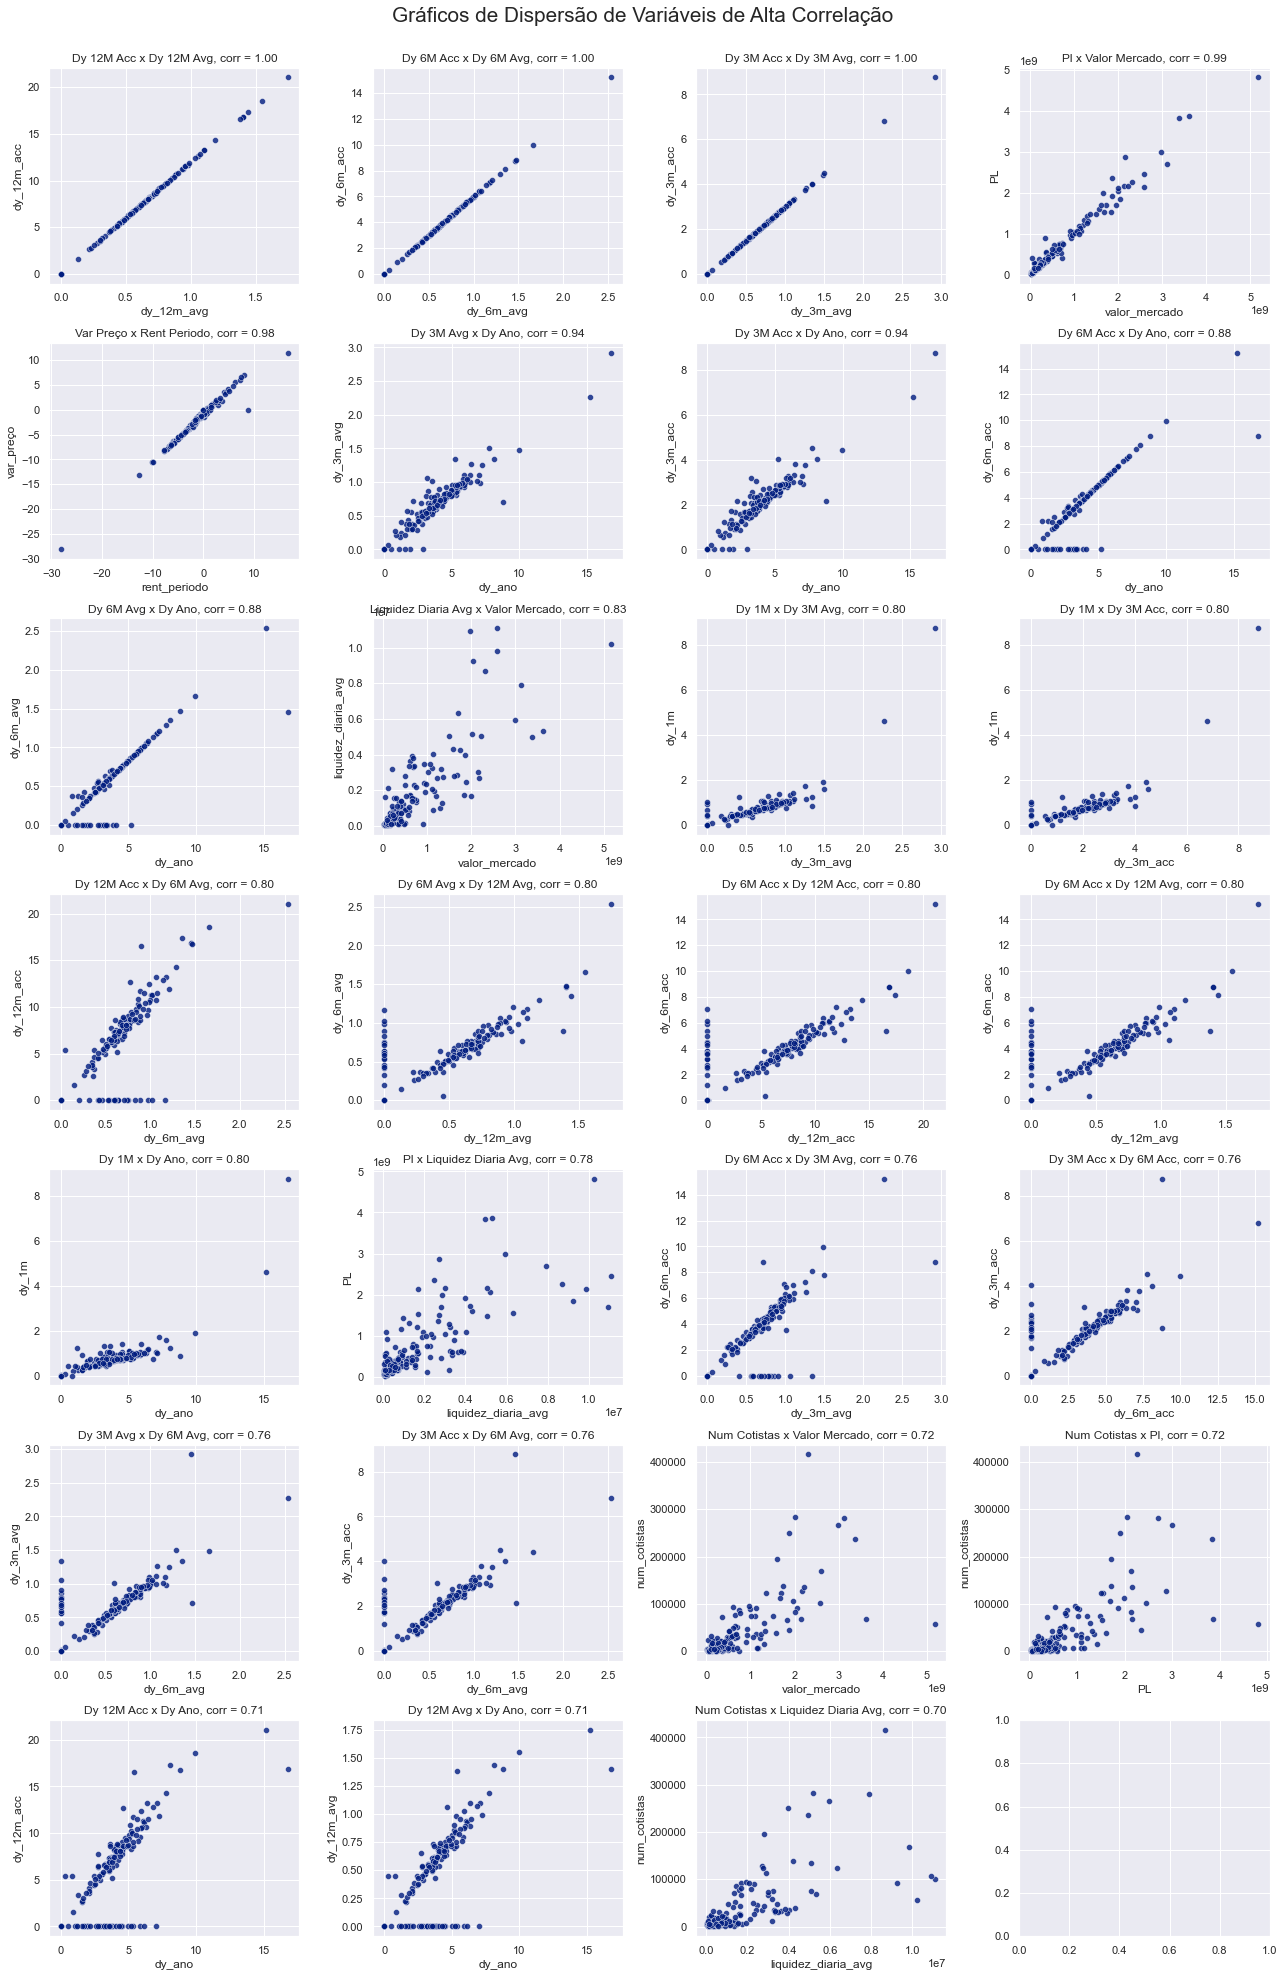

In [40]:
fig = ea.plot_high_correlation_variables(df, corr, 0.65, "Gráficos de Dispersão de Variáveis de Alta Correlação")
plt.show()

É possível observar que os três pirmeiros gráficos possuem uma correlação perfeita (igual a 1) entre os dados. Isso ocorre pois as variáveis dy_..._avg são uma média das variáveis dy_..._acc.

Ex: `dy_3m_avg = dy_3m_acc / 3`

In [41]:
df['dy_3m_avg'] == np.round(df['dy_3m_acc'] / 3, 2)

4      True
5      True
7      True
11     True
12     True
       ... 
346    True
348    True
349    True
351    True
352    True
Length: 173, dtype: bool

Dessa forma removerei as variáveis com final "_avg" para retirar dados redundantes...

In [42]:
df.drop(['dy_3m_avg', 'dy_6m_avg', 'dy_12m_avg', 'dy'], axis = 1, inplace = True)
df.shape

(173, 24)

In [43]:
df.head()

,ticker,nome,tipo_gestao,setor,menos_5_anos,pct_caixa,num_cotistas,PL,PVPA,liquidez_diaria_avg,...,dy_3m_acc,dy_6m_acc,dy_12m_acc,dy_ano,var_preço,rent_periodo,rent_acc,vacancia_fisica,qtd_ativos,valor_mercado
4,SHPH11,Shopping Patio Higienopolis,Passiva,Shoppings,False,0.4134,3105.0,5.013048e+08,0.9803,150895.54,...,0.75,2.23,3.35,1.27,0.00,0.24,-0.33,13.3,1.0,4.914291e+08
5,ALZR11,Alianza Trust Renda Imobiliária,Ativa,Logística,False,1.8679,93070.0,5.450889e+08,1.1276,1676327.17,...,1.59,2.91,4.96,2.91,5.65,6.18,-0.60,0.0,13.0,6.146422e+08
7,BBRC11,BB Renda Corporativa,Passiva,Outros,False,4.0449,8727.0,1.794707e+08,1.0003,201161.93,...,2.30,4.61,8.59,4.61,-3.22,-2.49,-6.74,5.4,20.0,1.795246e+08
11,BTAL11,BTG PACTUAL AGRO LOGÍSTICA,Ativa,Outros,True,33.8504,10544.0,6.132124e+08,0.9588,821338.54,...,1.68,0.00,0.00,2.02,-0.28,0.38,-1.13,0.0,7.0,5.879481e+08
12,BTCR11,BTG Pactual Crédito Imobiliário,Ativa,Títulos e Val. Mob.,False,5.6180,9427.0,4.681521e+08,0.9655,1228057.98,...,2.23,4.24,7.16,4.24,0.83,1.61,10.18,0.0,0.0,4.520008e+08


**Uma cópia desse dataframe será salva na pasta de dados para poder ser utilizada em outras análises.**

In [44]:
df.to_csv("data/dados_FIIs_processados.csv", index=False)

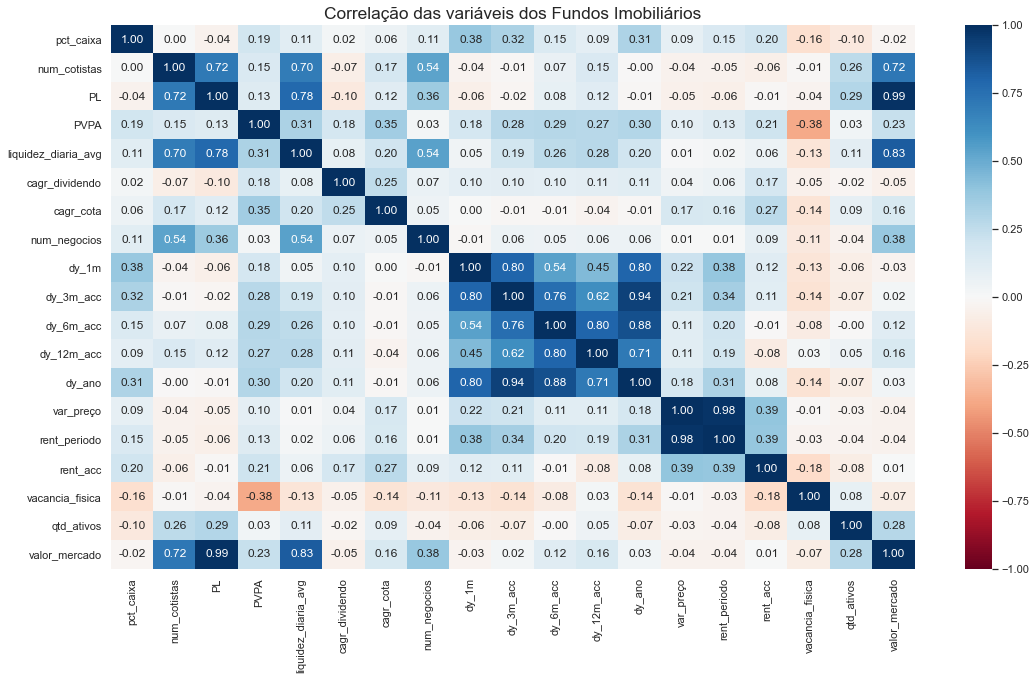

In [45]:
corr = df.iloc[:,5:].corr()

plt.figure(figsize=(18,10))

sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = 'RdBu')

plt.title("Correlação das variáveis dos Fundos Imobiliários", size='x-large')

plt.show()